In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

In [2]:
# file path
mmr_us_file = "../output_file/2009_2019_CDC_MMR.csv"
ins_us_file = "../output_file/2009_2019_US_ins_cleaned.csv"

In [3]:
# read csv files

mmr_df = pd.read_csv(mmr_us_file)
ins_df = pd.read_csv(ins_us_file)

In [22]:
mmr_df.head()

,record_id,state,id,state_code,year,deaths,births,maternal_mortality_ratio,population
0,0,Alabama,US.AL,1,2015,12,59657,20.11,2505795
1,1,Alabama,US.AL,1,2016,35,59151,59.17,2507714
2,2,Alabama,US.AL,1,2017,41,58941,69.56,2514911
3,3,Alabama,US.AL,1,2018,31,57761,53.67,2523756
4,4,Alabama,US.AL,1,2019,35,58615,59.71,2533668


In [71]:
ins_df.tail(10)

,location,year,employer,non_group,medicaid,medicare,military,uninsured,total
573,Tennessee,2019,58.8,7.7,16.4,2.6,1.9,12.5,100.0
574,Texas,2019,57.4,7.6,8.3,1.8,1.7,23.2,100.0
575,United States,2019,60.7,7.9,16.5,2.0,1.5,11.4,100.0
576,Utah,2019,68.3,10.8,6.7,0.8,1.4,11.9,100.0
577,Vermont,2019,61.4,6.9,24.2,1.9,0.0,4.6,100.0
578,Virginia,2019,65.7,7.0,10.7,2.4,4.9,9.4,100.0
579,Washington,2019,64.0,7.0,16.9,1.7,2.2,8.2,100.0
580,West Virginia,2019,56.6,3.5,27.0,3.6,1.2,8.0,100.0
581,Wisconsin,2019,69.1,7.6,14.5,1.3,0.8,6.7,100.0
582,Wyoming,2019,60.4,9.8,9.7,1.4,1.9,16.7,100.0


In [82]:
# merge mmr and insurance dataframes 
merged_ins_df = mmr_df.merge(ins_df, how="inner", left_on=["state", "year"], right_on=["location", "year"])
merged_ins_df.head()

,record_id,state,id,state_code,year,deaths,births,maternal_mortality_ratio,population,location,employer,non_group,medicaid,medicare,military,uninsured,total
0,0,Alabama,US.AL,1,2015,12,59657,20.11,2505795,Alabama,57.4,8.9,13.6,4.0,2.2,13.9,100.0
1,1,Alabama,US.AL,1,2016,35,59151,59.17,2507714,Alabama,58.7,9.1,13.8,3.8,1.9,12.7,100.0
2,2,Alabama,US.AL,1,2017,41,58941,69.56,2514911,Alabama,58.0,8.6,13.6,4.2,2.3,13.3,100.0
3,3,Alabama,US.AL,1,2018,31,57761,53.67,2523756,Alabama,58.8,7.5,13.7,3.6,2.5,13.9,100.0
4,5,Arizona,US.AZ,4,2010,17,87477,19.43,3216194,Arizona,52.9,6.5,17.1,1.6,1.8,20.1,100.0


In [83]:
# select just the columns we need
merged_df = merged_ins_df[["state", "year", "maternal_mortality_ratio", "medicaid", "uninsured"]]
merged_df.head(20)

,state,year,maternal_mortality_ratio,medicaid,uninsured
0,Alabama,2015,20.11,13.6,13.9
1,Alabama,2016,59.17,13.8,12.7
2,Alabama,2017,69.56,13.6,13.3
3,Alabama,2018,53.67,13.7,13.9
4,Arizona,2010,19.43,17.1,20.1
5,Arizona,2011,17.54,17.3,20.2
6,Arizona,2012,28.92,16.0,20.7
7,Arizona,2013,26.87,15.1,21.3
8,Arizona,2014,27.62,18.3,16.2
9,Arizona,2015,23.43,20.6,12.8


In [84]:
# find average mmr, medicaid and uninsured by state

merged_df.describe()

,year,maternal_mortality_ratio,medicaid,uninsured
count,278.000000,278.000000,278.000000,278.000000
mean,2013.762590,31.044568,14.306475,14.782374
std,2.856578,13.288968,4.635123,6.069401
min,2009.000000,8.170000,6.600000,2.600000
25%,2011.000000,21.832500,10.700000,10.025000
50%,2014.000000,28.405000,13.700000,14.400000
75%,2016.000000,37.757500,16.800000,18.800000
max,2018.000000,88.640000,31.000000,29.900000


In [85]:
# list of state names
states = merged_df["state"].unique()
states

# find average MMR per state for all reported data
avg_mmr = merged_df.groupby(["state"])["maternal_mortality_ratio"].mean()
avg_mmr

# find average medicaid coverage for years with an mmr reported
avg_medicaid = merged_df.groupby(["state"])["medicaid"].mean()
avg_medicaid

# find average uninsured rate for years with an mmr reported
avg_uninsured = merged_df.groupby(["state"])["uninsured"].mean()
avg_uninsured

# create a new dataframe
avg_df = pd.DataFrame({"Average MMR": avg_mmr,
                       "Average Medicaid Coverage": avg_medicaid,
                       "Average Uninsured": avg_uninsured})

avg_df_sorted = avg_df.sort_values(by= ["Average MMR"], ascending=False)
avg_df_sorted.head()

,Average MMR,Average Medicaid Coverage,Average Uninsured
state,,,
Louisiana,63.118571,18.500,16.728571
West Virginia,54.800000,26.600,8.000000
Alabama,50.627500,13.675,13.450000
Georgia,50.101000,9.900,21.170000
Arkansas,44.112000,16.480,17.560000


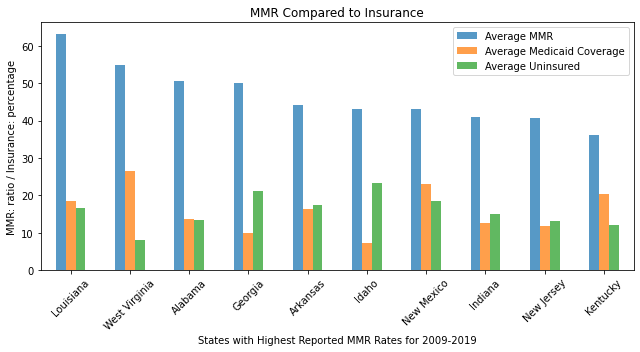

In [86]:
# graph the average mmr and insurance coverage for worst 10 states
avg_all_df = avg_df_sorted.head(10)
avg_all_df.plot(kind="bar", stacked=False, rot=45, alpha=0.75, figsize=(9,5))

plt.title("MMR Compared to Insurance")
plt.xlabel("States with Highest Reported MMR Rates for 2009-2019")
plt.ylabel("MMR: ratio / Insurance: percentage")

plt.tight_layout()
plt.legend(loc="best")

plt.savefig("../Resources/explore_ins_highest_mmr.png")
plt.show()

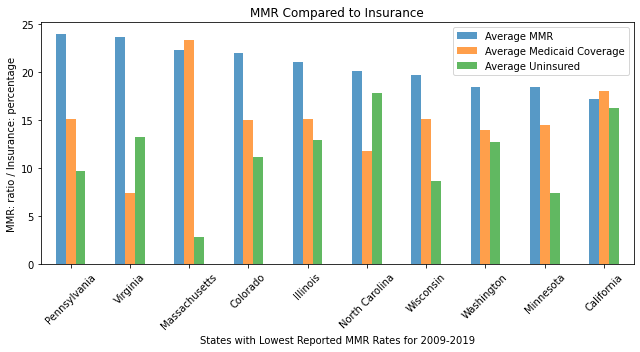

In [87]:
# graph the average mmr and insurance coverage for best 10 states
avg_all_df = avg_df_sorted.tail(10)
avg_all_df.plot(kind="bar", stacked=False, rot=45, alpha=0.75, figsize=(9,5))

plt.title("MMR Compared to Insurance")
plt.xlabel("States with Lowest Reported MMR Rates for 2009-2019")
plt.ylabel("MMR: ratio / Insurance: percentage")

plt.tight_layout()
plt.legend(loc="best")

plt.savefig("../Resources/explore_ins_lowest_mmr.png")

plt.show()

In [88]:
# viewing just 2018 data 
columns = ["state", "year", "maternal_mortality_ratio", "medicaid", "uninsured"]
mmr_2018_df = merged_df.loc[merged_df["year"] >= 2018, columns]
mmr_2018_df.head()

,state,year,maternal_mortality_ratio,medicaid,uninsured
3,Alabama,2018,53.67,13.7,13.9
12,Arizona,2018,29.73,20.0,13.4
22,Arkansas,2018,62.13,23.7,10.0
32,California,2018,17.81,23.5,8.6
49,Florida,2018,24.37,12.2,17.4


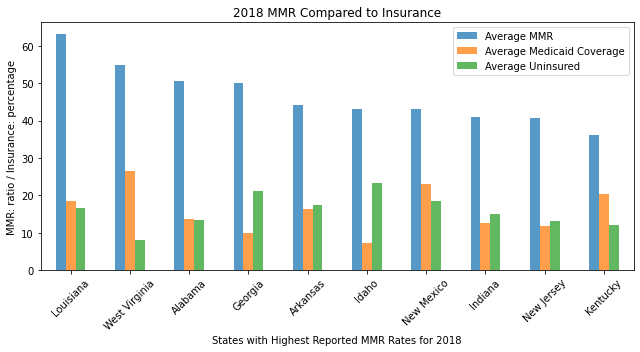

In [90]:
# graph the average mmr and insurance coverage for 2018 data
avg_2018_df = avg_df_sorted.head(10)
avg_2018_df.plot(kind="bar", stacked=False, rot=45, alpha=0.75, figsize=(9,5))

plt.title("2018 MMR Compared to Insurance")
plt.xlabel("States with Highest Reported MMR Rates for 2018")
plt.ylabel("MMR: ratio / Insurance: percentage")

plt.tight_layout()
plt.legend(loc="best")

plt.savefig("../Resources/explore_2018_highest_mmr.png")

plt.show()

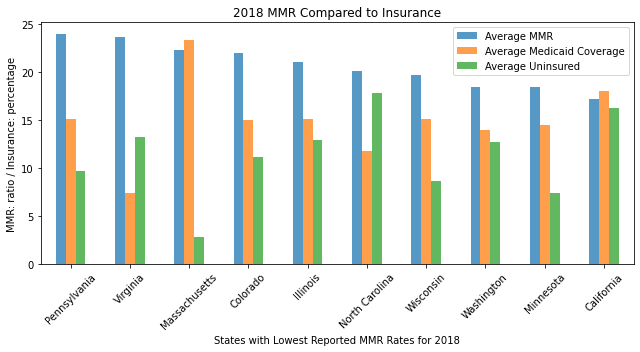

In [92]:
# graph the average mmr and insurance coverage for 2018 data
avg_2018_df = avg_df_sorted.tail(10)
avg_2018_df.plot(kind="bar", stacked=False, rot=45, alpha=0.75, figsize=(9,5))

plt.title("2018 MMR Compared to Insurance")
plt.xlabel("States with Lowest Reported MMR Rates for 2018")
plt.ylabel("MMR: ratio / Insurance: percentage")

plt.tight_layout()
plt.legend(loc="best")

plt.savefig("../Resources/explore_2018_lowest_mmr.png")

plt.show()

In [9]:
# list unique states
state_names = mmr_df["state"].value_counts()

In [10]:
# count unique states
state_names.count()

38

In [25]:
# viewing states for 2019 with mmr >= 38
high_mmr_df = mmr_df[(mmr_df.year == 2019) & (mmr_df.maternal_mortality_ratio >= 38)]
sorted_high_mmr_df = high_mmr_df.sort_values(by=["maternal_mortality_ratio"], ascending=False)
sorted_high_mmr_df

,record_id,state,id,state_code,year,deaths,births,maternal_mortality_ratio,population
157,157,Mississippi,US.MS,28,2019,22,36636,60.05,1533857
4,4,Alabama,US.AL,1,2019,35,58615,59.71,2533668
66,66,Georgia,US.GA,13,2019,64,126371,50.64,5456999
114,114,Louisiana,US.LA,22,2019,26,58941,44.11,2381744
251,251,South Carolina,US.SC,45,2019,24,57038,42.08,2655575
89,89,Indiana,US.IN,18,2019,33,80859,40.81,3411859
14,14,Arizona,US.AZ,4,2019,32,79375,40.31,3661420
106,106,Kentucky,US.KY,21,2019,21,53069,39.57,2266644
204,204,North Carolina,US.NC,37,2019,46,118725,38.74,5387820
25,25,Arkansas,US.AR,5,2019,14,36564,38.29,1536188


In [29]:
# viewing states for 2019 with mmr <= 
low_mmr_df = mmr_df[(mmr_df.year == 2019) & (mmr_df.maternal_mortality_ratio <= 30)]
sorted_low_mmr_df = low_mmr_df.sort_values(by=["maternal_mortality_ratio"], ascending=False)
sorted_low_mmr_df

,record_id,state,id,state_code,year,deaths,births,maternal_mortality_ratio,population
276,276,Utah,US.UT,49,2019,14,46826,29.90,1591041
240,240,Pennsylvania,US.PA,42,2019,39,134230,29.05,6527628
226,226,Oklahoma,US.OK,40,2019,14,49143,28.49,1996313
42,42,Colorado,US.CO,8,2019,15,62869,23.86,2857388
271,271,Texas,US.TX,48,2019,89,377599,23.57,14593179
168,168,Missouri,US.MO,29,2019,16,72127,22.18,3124766
307,307,Wisconsin,US.WI,55,2019,13,63270,20.55,2925225
148,148,Minnesota,US.MN,27,2019,11,66027,16.66,2829821
36,36,California,US.CA,6,2019,71,446479,15.90,19867369
78,78,Illinois,US.IL,17,2019,20,140128,14.27,6445263


In [49]:
# view just 2019 data for all states
mmr_df_2019 = mmr_df[(mmr_df.year == 2019)]
mmr_df_2019

# sort by mmr
sorted_mmr_df_2019 = mmr_df_2019.sort_values(by=["maternal_mortality_ratio"])
sorted_mmr_df_2019

,record_id,state,id,state_code,year,deaths,births,maternal_mortality_ratio,population
78,78,Illinois,US.IL,17,2019,20,140128,14.27,6445263
36,36,California,US.CA,6,2019,71,446479,15.90,19867369
148,148,Minnesota,US.MN,27,2019,11,66027,16.66,2829821
307,307,Wisconsin,US.WI,55,2019,13,63270,20.55,2925225
168,168,Missouri,US.MO,29,2019,16,72127,22.18,3124766
271,271,Texas,US.TX,48,2019,89,377599,23.57,14593179
42,42,Colorado,US.CO,8,2019,15,62869,23.86,2857388
226,226,Oklahoma,US.OK,40,2019,14,49143,28.49,1996313
240,240,Pennsylvania,US.PA,42,2019,39,134230,29.05,6527628
276,276,Utah,US.UT,49,2019,14,46826,29.90,1591041


In [54]:
# set x-axis and tick locations
x_axis = np.arange(len(sorted_mmr_df_2019))
tick_locations = [value+0.4 for value in x_axis]

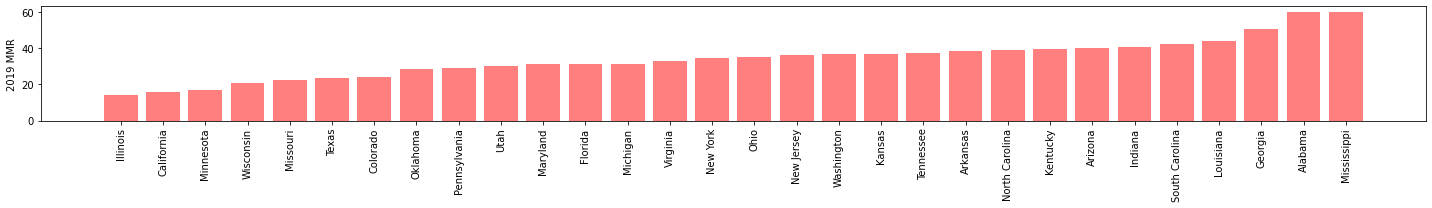

In [63]:
plt.figure(figsize=(20,3))
plt.bar(x_axis, sorted_mmr_df_2019["maternal_mortality_ratio"], color="r", alpha=0.5, align="edge")
plt.xticks(tick_locations, sorted_mmr_df_2019["state"], rotation="vertical")
plt.ylabel("2019 MMR")
plt.tight_layout()
plt.savefig("../Resources/explore_us_2019_mmr.png")
plt.show()

In [82]:
# viewing highest mmr for all years
highest_mmr_df = mmr_df.sort_values(by=["maternal_mortality_ratio"], ascending=False)
highest_10_df = highest_mmr_df.head(10)

In [83]:
# chart for highest mmrs for all years
# set x-axis and tick locations
x_axis_2 = np.arange(0, len(highest_10_df["state"]))
tick_locations_2 = [value+0.4 for value in x_axis_2]

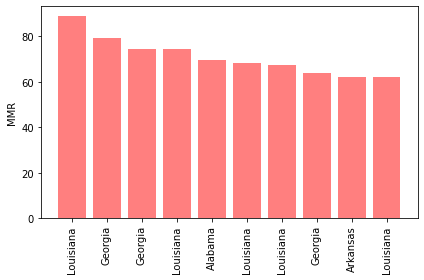

In [85]:
# plt.figure(figsize=(20,3))
plt.bar(x_axis_2, highest_10_df["maternal_mortality_ratio"], color="r", alpha=0.5, align="edge")
plt.xticks(tick_locations_2, highest_10_df["state"], rotation="vertical")
plt.ylabel("MMR")
plt.tight_layout()
plt.savefig("../Resources/explore_us_highest_mmr.png")
plt.show()

In [86]:
# viewing lowest mmr for all years
lowest_10_df = mmr_df.sort_values(by=["maternal_mortality_ratio"], ascending=False)
low_10_df = lowest_10_df.tail(10)

In [87]:
# chart for lowest mmrs for all years
# set x-axis and tick locations
x_axis_3 = np.arange(0, len(low_10_df["state"]))
tick_locations_3 = [value+0.4 for value in x_axis_3]

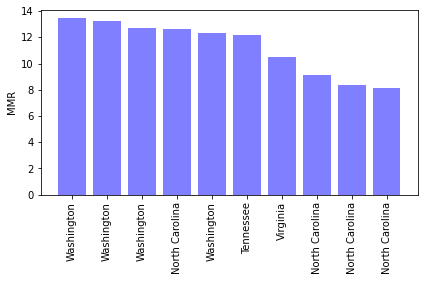

In [89]:
# style chart and save to png
plt.bar(x_axis_3, low_10_df["maternal_mortality_ratio"], color="b", alpha=0.5, align="edge")
plt.xticks(tick_locations_3, low_10_df["state"], rotation="vertical")
plt.ylabel("MMR")
plt.tight_layout()
plt.savefig("../Resources/explore_us_lowest_mmr.png")
plt.show()